Dataset:
           cidade  area_m2  quartos  banheiros  vagas  preco_aluguel
0       São Paulo       50        1          1      0           2500
1       São Paulo       80        2          2      1           3500
2       São Paulo      120        3          3      2           5500
3  Rio de Janeiro       45        1          1      0           2000
4  Rio de Janeiro       90        3          2      2           4000
5  Belo Horizonte       60        2          1      1           2200
6  Belo Horizonte      100        3          3      2           3800
7        Curitiba       55        1          1      0           1800
8        Curitiba       75        2          2      1           2700
9        Curitiba      110        3          3      2           4200

Erro médio absoluto: 152.55
R²: 0.74


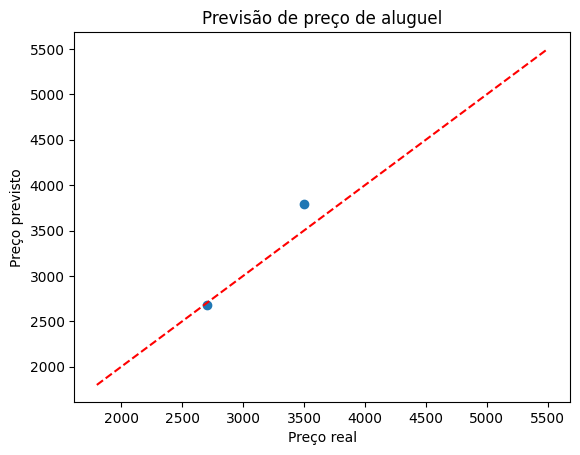

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Dataset simulado de imóveis brasileiros
data = {
    'cidade': ['São Paulo','São Paulo','São Paulo','Rio de Janeiro','Rio de Janeiro','Belo Horizonte','Belo Horizonte','Curitiba','Curitiba','Curitiba'],
    'area_m2': [50, 80, 120, 45, 90, 60, 100, 55, 75, 110],
    'quartos': [1, 2, 3, 1, 3, 2, 3, 1, 2, 3],
    'banheiros': [1, 2, 3, 1, 2, 1, 3, 1, 2, 3],
    'vagas': [0, 1, 2, 0, 2, 1, 2, 0, 1, 2],
    'preco_aluguel': [2500, 3500, 5500, 2000, 4000, 2200, 3800, 1800, 2700, 4200]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Converter cidade em variável numérica
df = pd.get_dummies(df, columns=['cidade'], drop_first=True)

# Dividir dados
X = df.drop('preco_aluguel', axis=1)
y = df['preco_aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsão
y_pred = modelo.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nErro médio absoluto:", round(mae, 2))
print("R²:", round(r2, 2))

# Comparar real x previsto
plt.scatter(y_test, y_pred)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Previsão de preço de aluguel")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
